In [1]:
pip install optax

Note: you may need to restart the kernel to use updated packages.


In [2]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import jax
import optax

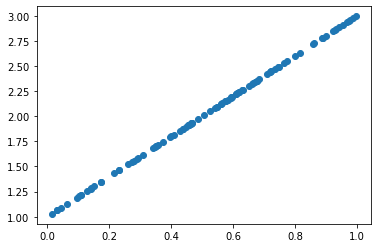

In [3]:
# Create some artificial, large data set
N = 1000000
x = np.random.uniform(size=N)
y = 1 + 2 * x 
X = np.column_stack([np.ones_like(x), x])


# Do a scatter plot with a subset of 100 points
plt.scatter(x[:100], y[:100])

In [8]:
X

array([[1.        , 0.58297084],
       [1.        , 0.14215456],
       [1.        , 0.60875546],
       ...,
       [1.        , 0.31524114],
       [1.        , 0.89880621],
       [1.        , 0.52025601]])

In [4]:
Θ = jnp.zeros(2)

def L(Θ, X, y):
    prediction = X @ Θ
    return jnp.mean((prediction - y)**2)

α = 0.1
optimizer = optax.adam(α)
opt_state = optimizer.init(Θ)

@jax.jit
def update(Θ, opt_state, X, y):
    grad = jax.grad(L)(Θ, X, y)
    updates, opt_state = optimizer.update(grad, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ, opt_state


In [11]:
# Batch gradient descent
Θ = jnp.zeros(2)

for iteration in range(1000):
    Θ, opt_state = update(Θ, opt_state, X, y)
    if iteration % 100 == 0:
        print(Θ)

[0.15166132 0.1542118 ]
[1.003153  2.0034726]
[1.0000117 2.000035 ]
[0.99999964 2.0000002 ]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]


In [12]:
# Sampling minibatches
batch_size = 128

def sample():
  i = np.random.choice(N, batch_size)
  return X[i], y[i]

In [13]:
# mini-batch (stochastic) gradient descent
Θ = jnp.zeros(2)

for iteration in range(1000):

  Xi, yi = sample()
  Θ, opt_state = update(Θ, opt_state, Xi, yi)

  if iteration % 100 == 0:
    print(Θ)

[0.16020659 0.17433669]
[1.0006393 2.0003138]
[1.0000341 2.0000405]
[0.99999976 2.0000002 ]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
[0.9999999 2.0000002]
